# Import Data & Packages

In [64]:
import time 
import matplotlib.pyplot as plt
import scipy
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os, shutil
import pickle

import talos


from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras.activations import *



np.random.seed(123)

In [2]:
#import the datasets

train_y = pickle.load(open("train_y.pkl", "rb" ) )
test_y = pickle.load(open("test_y.pkl", "rb" ) )
val_y = pickle.load(open("val_y.pkl", "rb" ) )

train_img = pickle.load(open("train_img.pkl", "rb" ) )
test_img = pickle.load(open("test_img.pkl", "rb" ) )
val_img = pickle.load(open("val_img.pkl", "rb" ) )

train_images = pickle.load(open("train_images.pkl", "rb" ) )
test_images = pickle.load(open("test_images.pkl", "rb" ) )
val_images = pickle.load(open("validate_images.pkl", "rb" ) )

train_labels = pickle.load(open("train_labels.pkl", "rb" ) )
test_labels = pickle.load(open("test_labels.pkl", "rb" ) )
val_labels = pickle.load(open("val_labels.pkl", "rb" ) )

# VGG19

Given that we haven't seen much success with our own CNN models so far, we will now use transfer learning to build our model. In this instance, we'll use VGG19.

In [4]:
import keras

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras import layers

from tensorflow.keras.applications import VGG19

In [5]:
pretrained = VGG19(weights='imagenet', 
                 include_top=False, 
                 input_shape=(64, 64, 3))

In [6]:
pretrained.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [7]:
cnn = Sequential()
cnn.add(pretrained)

# freezing layers so they don't get retrained with your new data
for layer in cnn.layers:
    layer.trainable=False

In [8]:
# adding our own dense layers
cnn.add(layers.Flatten())
cnn.add(layers.Dense(100, activation='relu'))
cnn.add(layers.Dense(50, activation='relu'))

In [9]:
cnn.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['acc'])


stopping_monitor = EarlyStopping(patience = 2)

In [10]:
history = cnn.fit(train_images,
                    train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_labels),
                    callbacks = [stopping_monitor])

Epoch 1/30
449/449 [==============================] - 165s 366ms/step - loss: 8.0971 - acc: 0.0205 - val_loss: 7.7877 - val_acc: 0.0228
Epoch 2/30
449/449 [==============================] - 195s 435ms/step - loss: 7.6165 - acc: 0.0220 - val_loss: 7.0893 - val_acc: 0.0225
Epoch 3/30
449/449 [==============================] - 218s 486ms/step - loss: 7.2026 - acc: 0.0258 - val_loss: 8.3965 - val_acc: 0.0200
Epoch 4/30
449/449 [==============================] - 222s 494ms/step - loss: 8.2952 - acc: 0.0202 - val_loss: 8.2141 - val_acc: 0.0200


In [13]:
results_train = cnn.evaluate(train_images, train_labels)
results_test = cnn.evaluate(test_images, test_labels)

111/111 [==============================] - 30s 271ms/step - loss: 8.2151 - acc: 0.0200


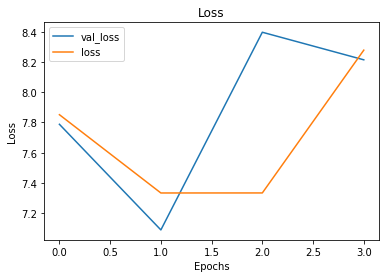

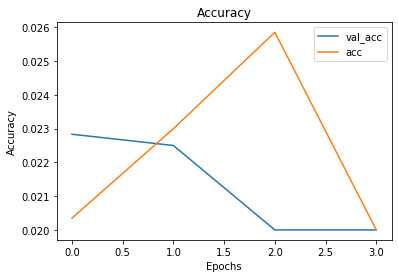

In [16]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
    
visualize_training_results(history)

In [11]:
#visualize intermediate layers 
#heat map - tells you which part of the image is focusing in on

# Modified VGG

In [74]:
pretrained = VGG19(weights='imagenet', 
                 include_top=False, 
                 input_shape=(64, 64, 3))

pretrained.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [79]:
cnn = Sequential()
cnn.add(pretrained)

# freezing layers so they don't get retrained with your new data
for layer in cnn.layers:
    layer.trainable=False

In [80]:
cnn.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['acc'])


stopping_monitor = EarlyStopping(patience = 2)

In [81]:
# adding our own dense layers
cnn.add(layers.Flatten())
cnn.add(layers.Dense(50, activation='relu'))

In [82]:
history = cnn.fit(train_images,
                    train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_labels),
                    callbacks = [stopping_monitor])

Epoch 1/30
449/449 [==============================] - 163s 361ms/step - loss: 9.2767 - acc: 0.0222 - val_loss: 8.1150 - val_acc: 0.0418
Epoch 2/30
449/449 [==============================] - 188s 418ms/step - loss: nan - acc: 0.0368 - val_loss: nan - val_acc: 0.0200
Epoch 3/30
449/449 [==============================] - 205s 457ms/step - loss: nan - acc: 0.0205 - val_loss: nan - val_acc: 0.0200


In [83]:
results_train = cnn.evaluate(train_images, train_labels)
results_test = cnn.evaluate(test_images, test_labels)

111/111 [==============================] - 40s 360ms/step - loss: nan - acc: 0.0200


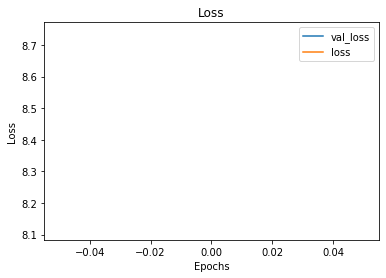

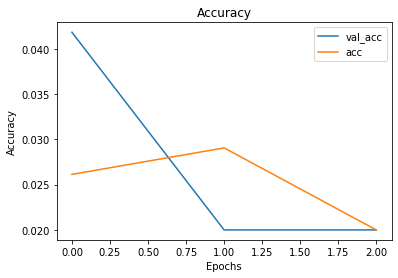

In [84]:
visualize_training_results(history)

# Inceptionv3

Given lack of success with VGG19, we'll also try Inceptionv3.

In [24]:
#re-shaping as minimum image size is 75

In [37]:
#resizing images
import os, shutil

test_folder = './split_data/test'
train_folder = './split_data/train'
validate_folder = './split_data/validate'

#test
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(150, 150), batch_size = 3550) 

#validate
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        validate_folder, 
        target_size=(150, 150), batch_size = 6000)

#train
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(150, 150), batch_size=14350)

Found 3550 images belonging to 50 classes.
Found 6000 images belonging to 50 classes.
Found 14350 images belonging to 50 classes.


In [38]:
# create the data sets
train_images_bigger, train_labels_bigger = next(train_generator)
test_images_bigger, test_labels_bigger = next(test_generator)
validate_images_bigger, validate_labels_bigger = next(val_generator)


In [39]:
train_img_bigger = train_images_bigger.reshape(train_images_bigger.shape[0], -1)
test_img_bigger = test_images_bigger.reshape(test_images_bigger.shape[0], -1)
val_img_bigger = validate_images_bigger.reshape(validate_images_bigger.shape[0], -1)

print(train_img_bigger.shape)
print(test_img_bigger.shape)
print(val_img_bigger.shape)

train_y_bigger = np.reshape(train_labels_bigger[:,0], (14350,1))
test_y_bigger = np.reshape(test_labels_bigger[:,0], (3550,1))
val_y_bigger = np.reshape(validate_labels_bigger[:,0], (6000,1))

(14350, 67500)
(3550, 67500)
(6000, 67500)


In [59]:
validate_labels_bigger.shape

(6000, 50)

In [46]:
# Explore your dataset again
m_train = train_images_bigger.shape[0]
num_px = train_images_bigger.shape[1]
m_test = test_images_bigger.shape[0]
m_val = validate_images_bigger.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images_bigger.shape))
print ("train_labels shape: " + str(train_labels_bigger.shape))
print ("test_images shape: " + str(test_images_bigger.shape))
print ("test_labels shape: " + str(test_labels_bigger.shape))
print ("val_images shape: " + str(validate_images_bigger.shape))
print ("val_labels shape: " + str(validate_labels_bigger.shape))

Number of training samples: 14350
Number of testing samples: 3550
Number of validation samples: 6000
train_images shape: (14350, 150, 150, 3)
train_labels shape: (14350, 50)
test_images shape: (3550, 150, 150, 3)
test_labels shape: (3550, 50)
val_images shape: (6000, 150, 150, 3)
val_labels shape: (6000, 50)


In [66]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import RMSprop


pretrained = InceptionV3(weights='imagenet', 
                 include_top=False, 
                 input_shape=(150, 150, 3))

pretrained.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 74, 74, 32)   864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 74, 74, 32)   96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 74, 74, 32)   0           batch_normalization_188[0][0]    
_______________________________________________________________________________________

In [70]:
print(validate_images_bigger.shape)
print(validate_labels_bigger.shape)
print(train_images_bigger.shape)
print(train_labels_bigger.shape)

(6000, 150, 150, 3)
(6000, 50)
(14350, 150, 150, 3)
(14350, 50)


In [71]:
cnn = Sequential()
cnn.add(pretrained)

# freezing layers so they don't get retrained with your new data
for layer in cnn.layers:
    layer.trainable=False

In [72]:
# adding our own dense layers
cnn.add(layers.Flatten())
cnn.add(layers.Dense(100, activation='relu'))
cnn.add(layers.Dense(50, activation='relu'))

cnn.compile(loss='categorical_crossentropy',
              optimizer = RMSprop(lr=0.0001),
              metrics=['acc'])


stopping_monitor = EarlyStopping(patience = 2)

history = cnn.fit(train_images_bigger,
                    train_labels_bigger,
                    epochs=30,
                    batch_size=32,
                    validation_data=(validate_images_bigger, validate_labels_bigger),
                  callbacks = [stopping_monitor])

Epoch 1/30
449/449 [==============================] - 162s 355ms/step - loss: 5.3129 - acc: 0.1550 - val_loss: 4.6825 - val_acc: 0.3423
Epoch 2/30
449/449 [==============================] - 155s 345ms/step - loss: nan - acc: 0.3122 - val_loss: nan - val_acc: 0.0200
Epoch 3/30
449/449 [==============================] - 170s 379ms/step - loss: nan - acc: 0.0217 - val_loss: nan - val_acc: 0.0200


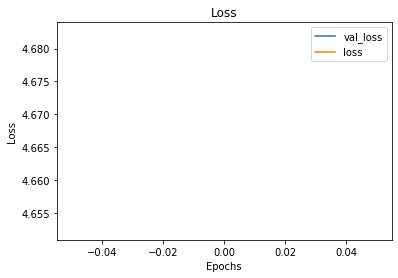

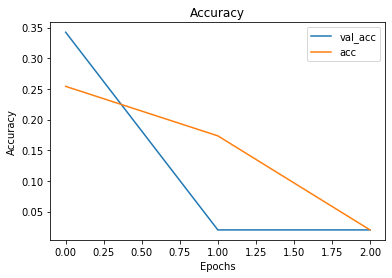

In [73]:
visualize_training_results(history)